In [1]:
# %matplotlib inline
%time from hikyuu.interactive import *
#use_draw_engine('echarts') #use_draw_engine('matplotlib')  #默认为'matplotlib'绘图

Initialize hikyuu_2.6.6_202508081714_RELEASE_macosx_arm64 ...
2025-08-09 00:39:31.841 [HKU-I] - current python version: 3.12.7 (main.cpp:68)


2025-08-09 00:39:33,375 [INFO] runing in interactive session [<module>] (/Users/fasiondog/workspace/hikyuu/hikyuu/__init__.py:109) [hikyuu::hku_info]
2025-08-09 00:39:33,376 [INFO] running in jupyter [<module>] (/Users/fasiondog/workspace/hikyuu/hikyuu/__init__.py:116) [hikyuu::hku_info]


current plugin path: /Users/fasiondog/.hikyuu/plugin
2025-08-09 00:39:33.869 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-08-09 00:39:33.871 [HKU-I] - 加载市场信息…… (StockManager.cpp:576)
2025-08-09 00:39:33.872 [HKU-I] - 加载证券类型信息…… (StockManager.cpp:594)
2025-08-09 00:39:33.872 [HKU-I] - 加载证券信息…… (StockManager.cpp:480)
2025-08-09 00:39:33.920 [HKU-I] - 加载权息数据…… (StockManager.cpp:612)
2025-08-09 00:39:34.024 [HKU-I] - 加载板块信息…… (StockManager.cpp:185)
2025-08-09 00:39:34.213 [HKU-I] - 加载K线数据…… (StockManager.cpp:189)
2025-08-09 00:39:34.213 [HKU-I] - 预加载 day K线数据至缓存 (最大数量: 100000)! (StockManager.cpp:233)
2025-08-09 00:39:34.213 [HKU-I] - 0.34 秒数据加载完毕. (StockManager.cpp:195)
2025-08-09 00:39:34.214 [HKU-I] - 启动行情接收. (SpotAgent.cpp:38)
CPU times: user 2.42 s, sys: 1.39 s, total: 3.81 s
Wall time: 2.45 s


1 简单示例
========

查询并绘制上证指数最后100个交易日的K线数据

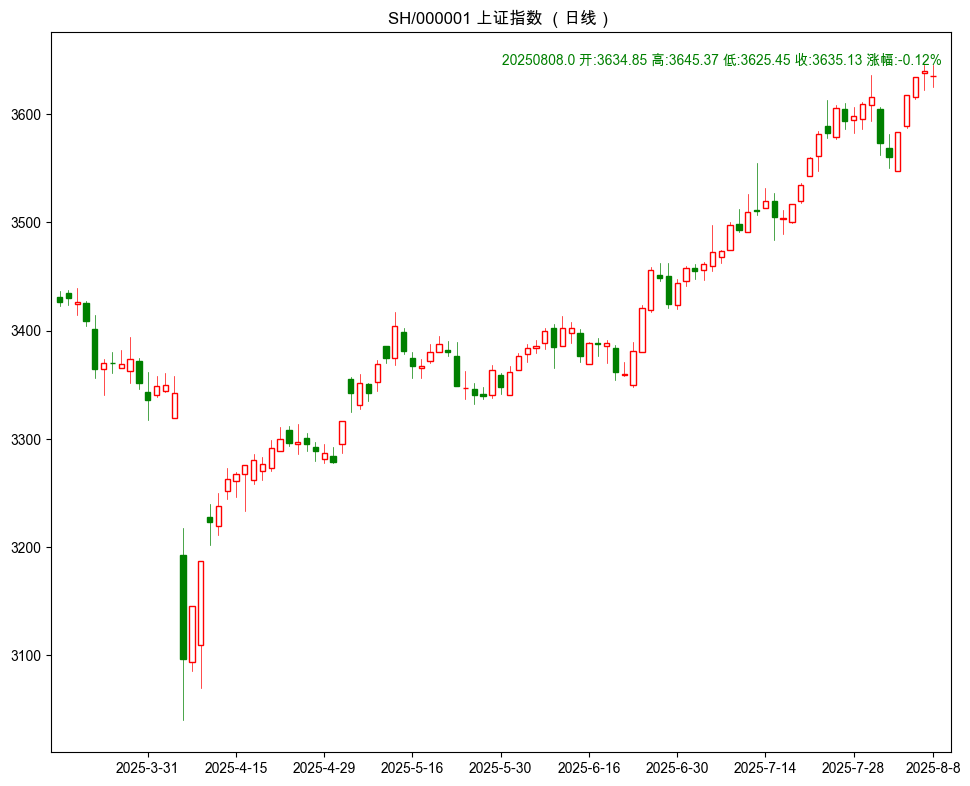

In [2]:
s = sm['sh000001']
k = s.get_kdata(Query(-100))  
k.plot()

2 查看与遍历K线数据
==========

K线数据可以象list一样遍历和查看具体值

In [3]:
s = sm['sh000001']
k = s.get_kdata(Query(-100))  
print(k)

KData{
  size : 100
  stock: Stock(SH, 000001, 上证指数, 指数, 1, 1990-12-20 00:00:00, +infinity),
  query: KQuery(-100, 9223372036854775807, INDEX, DAY, NO_RECOVER)
}


In [4]:
#查看最后5个交易日的K线值
k[-5:]

KRecordList[KRecord(Datetime(202508040000), 3547.1600, 3583.3100, 3547.1600, 3583.3100, 63977560.5000, 4585736.0000), KRecord(Datetime(202508050000), 3588.8100, 3617.6000, 3586.9700, 3617.6000, 65638249.3000, 4997978.0000), KRecord(Datetime(202508060000), 3615.8100, 3634.3100, 3613.9900, 3633.9900, 70722125.8000, 5124672.0000), KRecord(Datetime(202508070000), 3637.7800, 3645.1200, 3622.5200, 3639.6700, 74969999.0000, 5355012.0000), KRecord(Datetime(202508080000), 3634.8500, 3645.3700, 3625.4500, 3635.1300, 71356973.1000, 5264076.0000)]

In [5]:
#遍历查询最大收盘价
max_close = 0
for v in k:
    if v.close > max_close:
        max_close = v.close
print(max_close)

3639.67


K线数据（KData）其实是有KRecord组成的数组，KRecord的属性如下：

In [6]:
print("日期 - ", k[0].datetime)
print("开盘价 - ", k[0].open)
print("最高价 - ", k[0].high)
print("最低价 - ", k[0].low)
print("收盘价 - ", k[0].close)
print("成交金额 - ", k[0].amount)
print("成交量 - ", k[0].volume)

日期 -  2025-03-17 00:00:00
开盘价 -  3430.81
最高价 -  3436.35
最低价 -  3422.46
收盘价 -  3426.13
成交金额 -  63934994.800000004
成交量 -  5156851.0


3 Query详解
========

获取Stock的K线数据，需要指定查询条件，可按索引和日期两种方式查询。

构建按索引方式查询条件：Query(start=0, end=None , kType=Query.DAY, recoverType=Query.NO_RECOVER)

构建按日期方式查询条件：QueryByDate(start=None, end=None, kType=Query.DAY, recoverType=Query.NO_RECOVER)

其中，索引遵循Python的惯用方式，即以0位起始，以[start, end)的方式查询，支持负数表示倒叙; 按日期查询同样遵循[start, end)惯例。

kType: 为K线数据类型（日线、分钟线、周线等）:

    - Query.DAY      日线
    - Query.WEEK     周线
    - Query.MONTH    月线
    - Query.QUARTER  季线
    - Query.HALFYEAR 半年线
    - Query.YEAR     年线
    - Query.MIN      1分钟线
    - Query.MIN5     5分钟线
    - Query.MIN15    15分钟线
    - Query.MIN30    30分钟线
    - Query.MIN60    60分钟线
    
recoverType：为复权类型（不复权、前向复权、后向复权、等比前向复权、等比后向复权），仅支持日线复权：

    - Query.NO_RECOVER     不复权
    - Query.FORWARD        前向复权
    - Query.BACKWARD       后向复权
    - Query.EQUAL_FORWARD  等比前向复权
    - Query.EQUAL_BACKWARD 等比后向复权

3.1 按索引方式查询K线数据
-------------------------

In [7]:
#查询股票前100个交易日的K线数据
k = s.get_kdata(Query(0, 100))

#查询股票最后100个交易日K线数据
k = s.get_kdata(Query(-100))

#查询股票第199个交易日到第209个交易日的K线数据
k = s.get_kdata(Query(200, 210))

#查询股票倒数第100个交易日至倒数第10个交易日的K线数据
k = s.get_kdata(Query(-100, -10))

3.2 按日期方式查询K线数据
--------------------------

按日期查询同样遵循 [start, end) 惯例。

日期类型为Hikyuu库中定义的 Datetime，其记录的是“年月日时分”。可使用Python的datetime类型、日期字符串或数字表示法进行构建:

- Datetime(datetime.date(2017,1,1))  - 从Python的datetime构建
- Datetime('2017-1-1 9:35') - 通过日期字符串构建
- Datetime(201701010935) - 通过数字进行构建，数字格式须如“yyyymmddhhmm”（4位年份2位月份2位小时数2位分钟数）

In [8]:
#查询2017年1月1日至今的日线数据
k = s.get_kdata(Query(Datetime(201701010000)))

#查询2017年1月1日至3月31日日线数据
k = s.get_kdata(Query(Datetime(201701010000), Datetime(201704010000)))

#查询2017年1月5日1分钟线数据
k = s.get_kdata(Query(Datetime(201701050000), Datetime(201701060000), ktype=Query.MIN))
k.plot()

kdata is None


3.3 查询复权日线
----------------

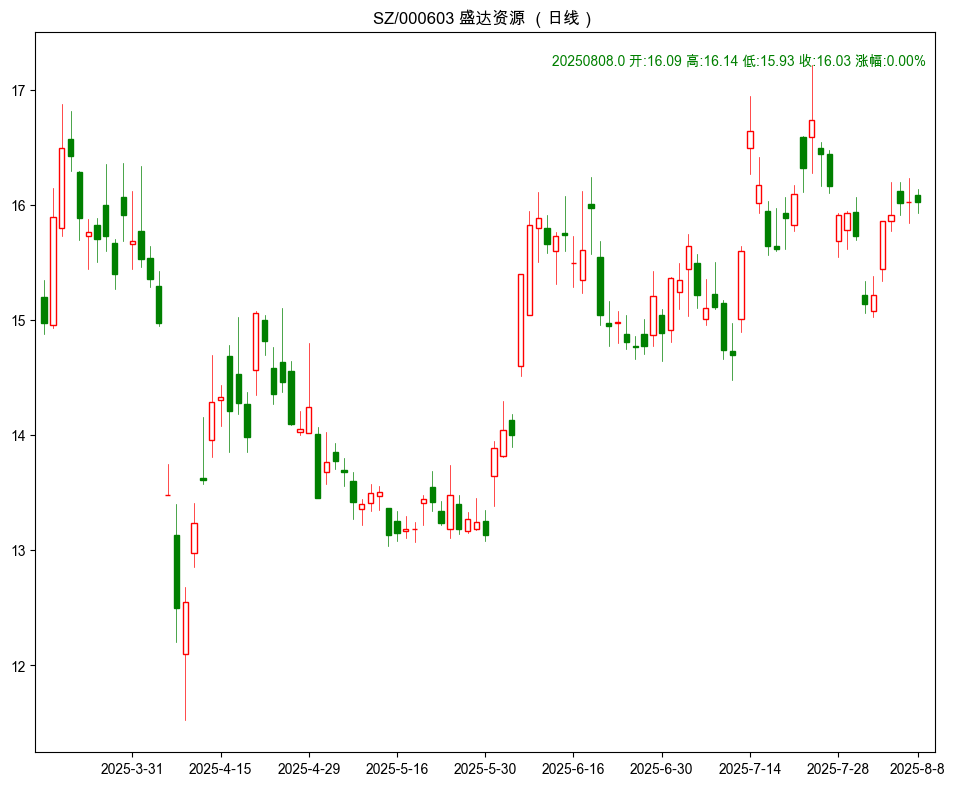

In [9]:
s = sm['sz000603']

#查询股票最后100个交易日K线数据，不复权
k = s.get_kdata(Query(-100))
k.plot()

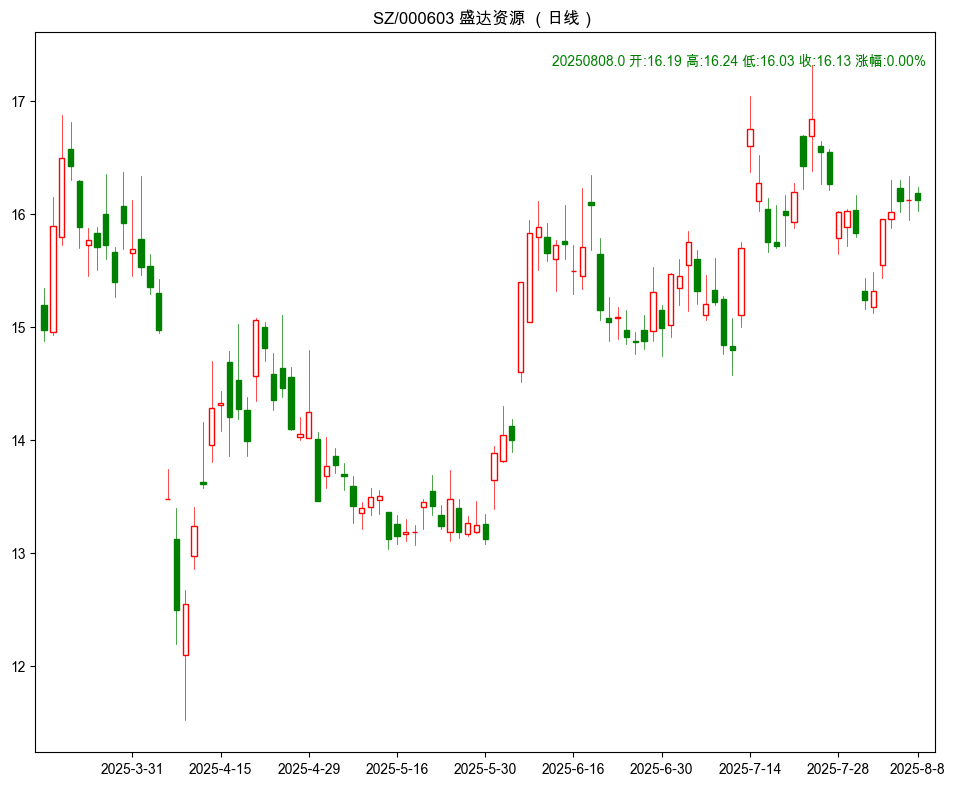

In [10]:
#查询股票最后100个交易日K线数据，后向复权
k = s.get_kdata(Query(-100, recover_type=Query.BACKWARD))
k.plot()